## Exploratory Data Analysis(EDA)


* In the following notebook, I will try to analyze a data collected from a bank database and show some of my findings when it comes to the data distribution and correlation.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df=pd.read_csv('C:/Users/abenet/Desktop/data/Week 6/Technical Content/data/data.csv')
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


### Overview of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Summary Statistics

In [106]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


- The mean value for both the `Amount` and `Value` columns are in the thousands. The mean of `Value` column is 9,900 which is surprising when you see that there are some values that are in the millions. This low value of the mean shows you the abundance of small values in the column. 
- For the `CountryCode`, standard deviation is zero because all the values in this column are 256. 
- For the `PricingStrategy`, There are only 4 unique values in the column. The mean is around 2 which shows us that most of the entries are 2.
- For the `FraudResult`, only two entries are found.

### Distribution of Numerical Features

In [3]:
# Classifying the columns that are numerical and categorical
li=list(df.columns)
num_columns=['Amount','Value']
li.remove('Amount')
li.remove('Value')
cat_columns=li
cat_columns

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

array([[<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Value'}>]], dtype=object)

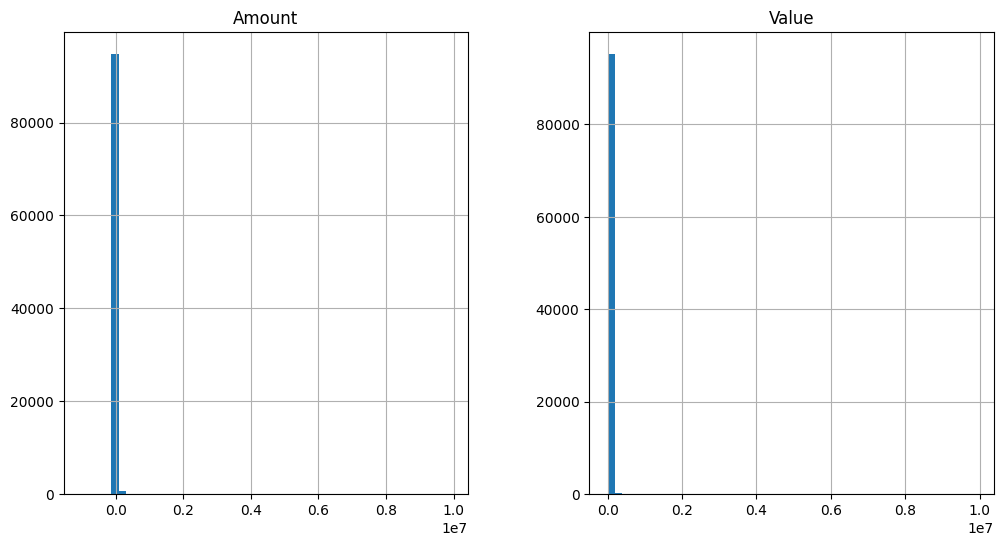

In [108]:
df[num_columns].hist(figsize=(12,6),bins=50)

- The above histogram plots show you that most of the values are concentrated around the thousands. Increasing the bins wouldn't help because of the concentration of values. 

### Distribution of Categoriacal Columns

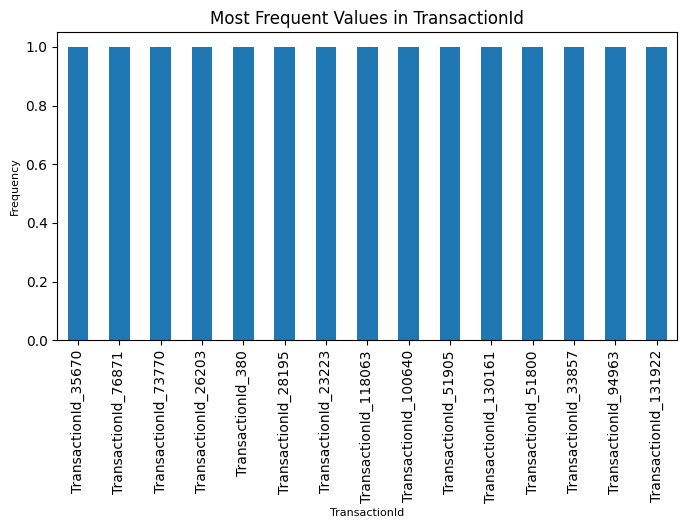

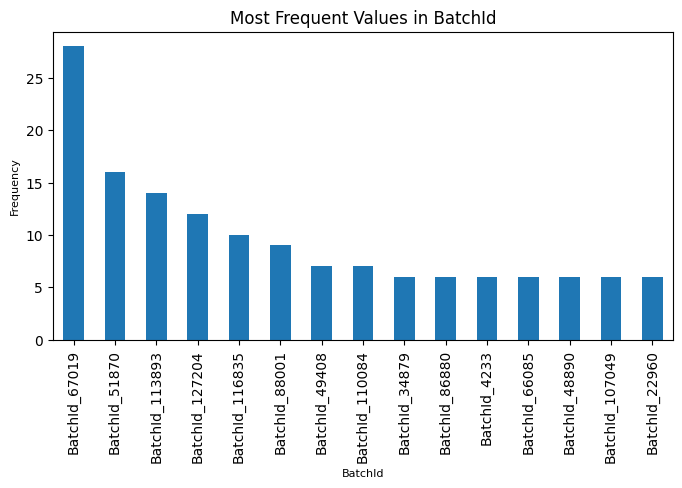

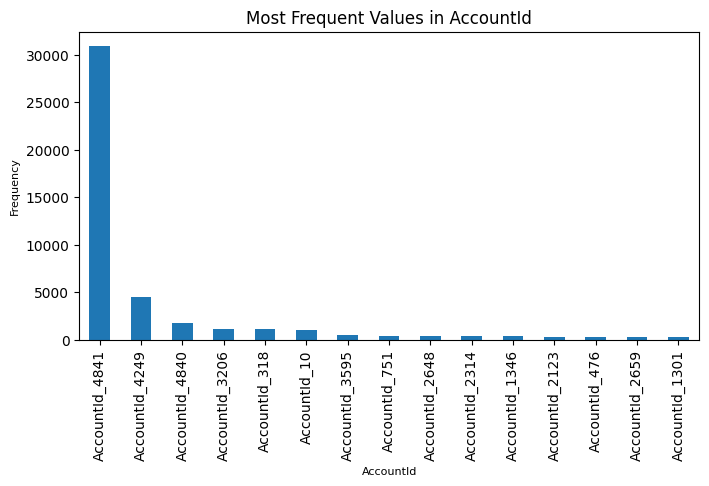

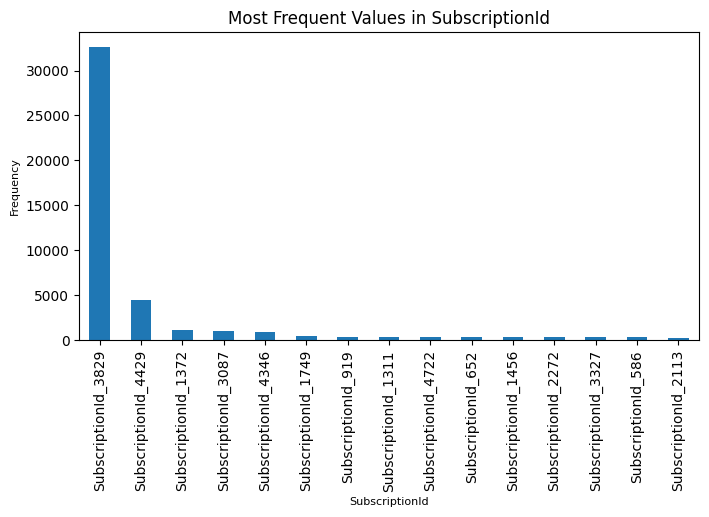

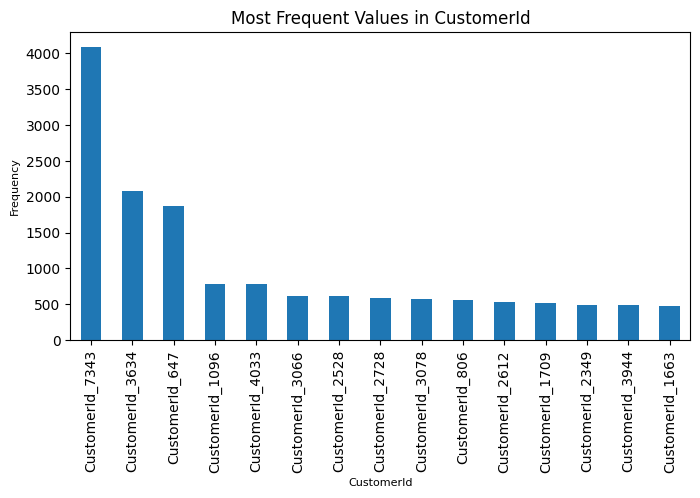

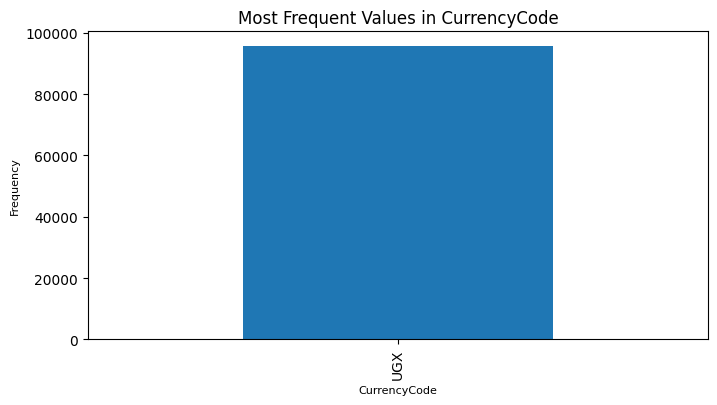

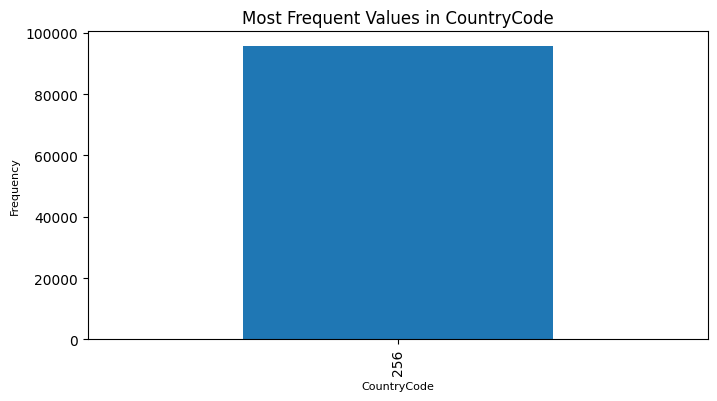

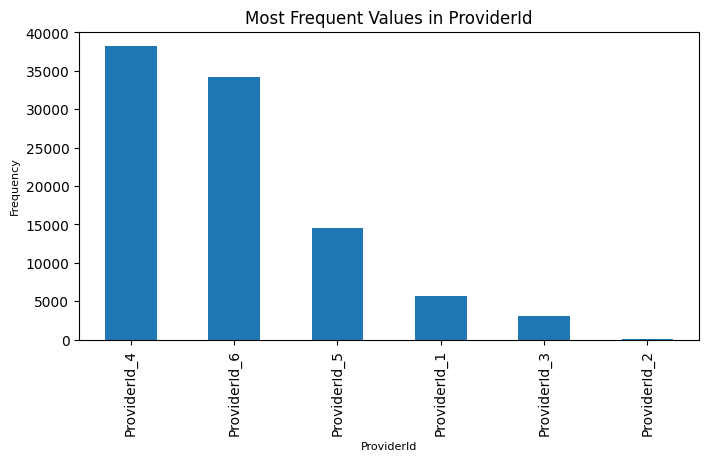

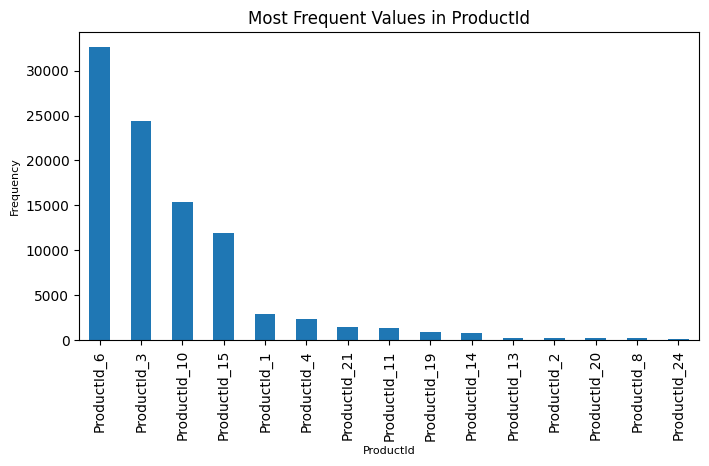

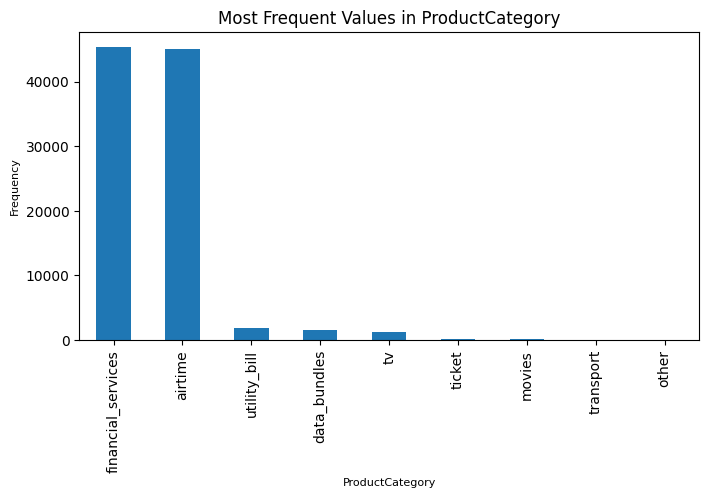

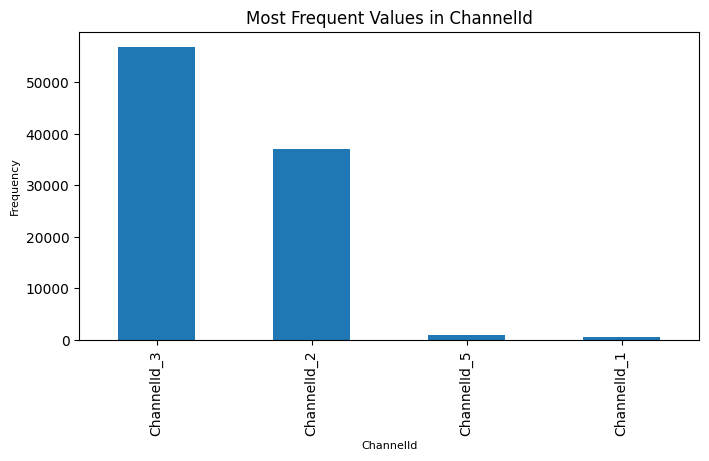

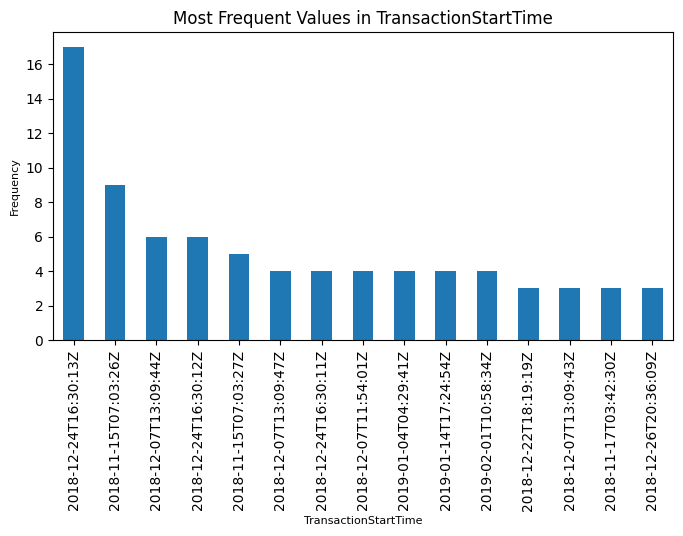

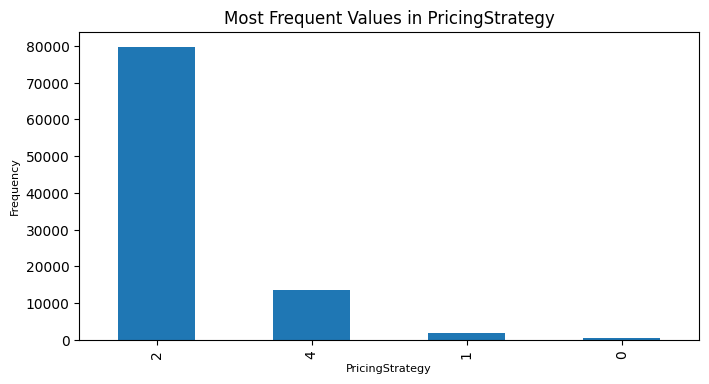

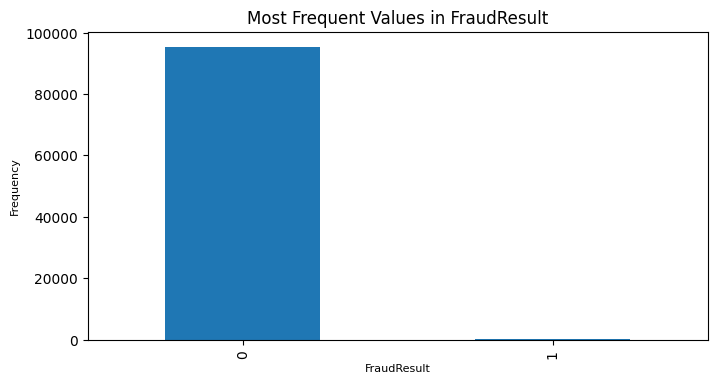

In [4]:
# Loop through each categorical column in cat_columns and plot each categorical columns
for i in cat_columns:
    top = df[i].value_counts().nlargest(15)
    
    plt.figure(figsize=(8, 4))
    top.plot(kind='bar')

    plt.title(f'Most Frequent Values in {i}', fontsize=12)
    plt.xlabel(i, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.show()


- There are certain things that can be observed from the above bar plots:
    1. There is a unique `TransactionId` for each value in the dataframe. 
    2. Even though most of the `BatchId` values occured once, There are certain batches that hold more than one transaction in them. For example, **BatchId_67019** holds 28 transactions as one batch. 
    3. Since `AccountId` is a unique identifier of a customer, There are certain customers that make more transactions than the other. `AccountId_4841` made the most transactions with more than 30,000 transactions made. The same can be said about `SubscriptionId` and `CustomerId`. There are certain values that rise than the other but there is a constant distribution between the occurence of unique Id values.
    4. There is only one value when it comes to `CurrencyCode` and `CountryCode` columns. **UGX** for Currency code and **256** for country code.
        > Both of the Codes (**UGX** and **256**) indicate that we are dealing with **Ugandan Shilling**
    5. There is notable variation in the `ProviderId` column, with **ProviderId_4** and **ProviderId_6** dominating as the source providers, together accounting for **75.6%** of all items purchased.
    6. **ProductId_6** and **ProductId_3** are also the most bought items from these providers.
    7. When considering the `ProductCategory` column, **financial_services** and **airtime** completely dominate the list with the two categories accounting for **94.5** of all the transactions. 
    8. Most customers take a `PricingStrategy` of **2**.

In [104]:
df['TransactionStartTime'].value_counts()
#((45405+45027)/len(df))*100

TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
                        ..
2019-02-13T09:36:07Z     1
2019-02-13T09:36:18Z     1
2019-02-13T09:36:48Z     1
2019-02-13T09:37:48Z     1
2018-11-15T03:32:55Z     1
Name: count, Length: 94556, dtype: int64

### Correlation Analysis

<Axes: >

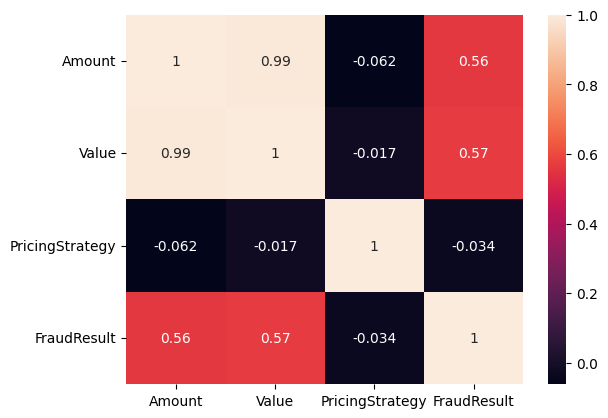

In [89]:
numerical=list(df.select_dtypes(include=[np.int64,np.float64]))
numerical.remove('CountryCode')
sns.heatmap(df[numerical].corr(),annot=True)

- I removed the `CountryCode` column from the numerical column because there is only one unique value in the entire dataset (**256**). 
- The highest correlation observed in the above correlation matrix is found between the `Amount` and the `Value` column. This is anticipated since **Value** is the absolute value result of **Amount**.
- Another positive relationship that is observed in the dataset is found between the `FraudResult` and `Value` column. The relationship isn't particularly strong, with a correlation coefficient of **0.57**, but it does show that as the transaction amount increases, the likelihood of fraud also rises.
- `PricingStrategy` had almost no relation with any of the other columns. The correlation coefficient relating `PricingStrategy` with other variables was very negligible. 

### Missing values

In [87]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

- There are no null values in the entire dataset

### Outlier Detection

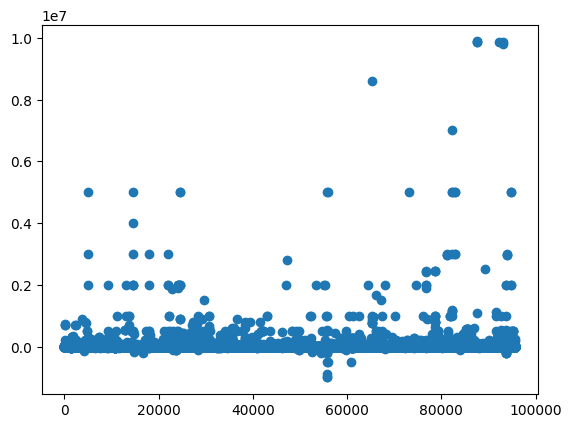

In [90]:
plt.scatter(x=df.index,y=df['Amount'])

<Axes: >

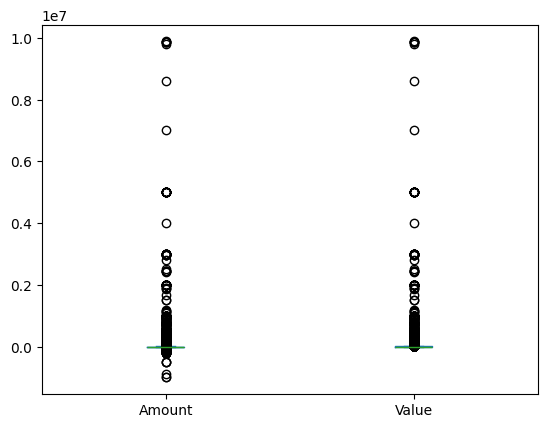

In [88]:
df[num_columns].plot(kind='box')

As we can see, there are many outliers in the `Amount` and `Value` column. The quartiles are located between 50 and 5000. But there are certain values in the data that are in million. Also, the box plot above clearly shows the values that are above 4 million. The scatter plot can also be used to show outliers. Outliers will be taken care of in the normalization stage. 